In [111]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt

#TEST_IMAGE_DIR = "./dog-breed-identification/test/"
TRAIN_IMAGE_DIR = "./dog-breed-identification/train/"
LABELS = './dog-breed-identification/labels.csv'

data = pd.read_csv(LABELS)
class_names = data['breed'].unique()

print(data)

                                     id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]


In [112]:
#Data from the csv only contans the ids of the photos and not the photos itself
#Iterate through the data and check whether the photo is in test or train
#Then fetch it and store it in its proper variable
import tensorflow as tf
from os.path import join
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def load_and_preprocess_images(image_dir, image_ids, target_size=(90, 90)):
    image_data = []
    for img_id in image_ids:
        img_path = join(image_dir, img_id + ".jpg")
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img)
        preprocessed_img = preprocess_input(img_array) #I dont flatten the image here
        image_data.append(preprocessed_img)
    return np.array(image_data)

# Get image IDs for train and test
train_image_ids = data['id'].values
labels = data['breed'].values
# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

train_image_ids, test_image_ids, train_labels, test_labels = train_test_split(train_image_ids, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels)

train_images = load_and_preprocess_images(TRAIN_IMAGE_DIR, train_image_ids)
test_images = load_and_preprocess_images(TRAIN_IMAGE_DIR, test_image_ids)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


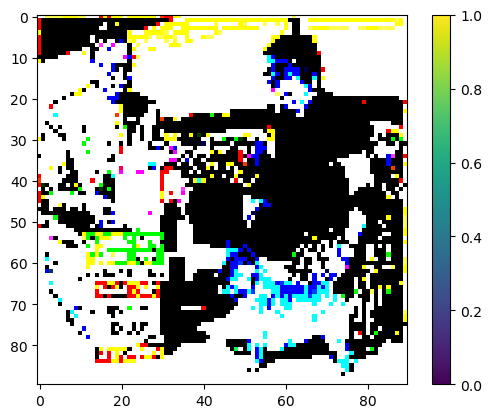

81


In [113]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()
print(train_labels[3])

In [114]:
train_images = train_images / 250.0
test_images = test_images / 250.0

In [205]:
from tensorflow import keras

model = keras.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation = 'relu', input_shape = (90, 90, 3)),
    tf.keras.layers.MaxPooling2D (2,2), 
    tf.keras.layers.Conv2D(32, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation ='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(120, activation="softmax"),
])

In [206]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [207]:
model.fit(train_images, train_labels, epochs=6)

Epoch 1/6
256/256 [==============================] - 12s 45ms/step - loss: 4.7492 - accuracy: 0.0115
Epoch 2/6
256/256 [==============================] - 11s 45ms/step - loss: 4.4856 - accuracy: 0.0331
Epoch 3/6
256/256 [==============================] - 11s 44ms/step - loss: 4.2434 - accuracy: 0.0574
Epoch 4/6
256/256 [==============================] - 11s 45ms/step - loss: 4.0313 - accuracy: 0.0882
Epoch 5/6
256/256 [==============================] - 12s 45ms/step - loss: 3.7455 - accuracy: 0.1309
Epoch 6/6
256/256 [==============================] - 12s 45ms/step - loss: 3.3024 - accuracy: 0.2004


In [208]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

64/64 - 1s - loss: 4.5405 - accuracy: 0.0694 - 1s/epoch - 16ms/step

Test accuracy: 0.0694376528263092
